# Confidence and Accuracy Analysis

In [7]:
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import seaborn as sns


In [2]:
def get_confidence(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        html_content = file.read()

    # Parse the HTML
    soup = BeautifulSoup(html_content, "html.parser")

    # Define a regex pattern for "Extracted Answer Confidence"
    pattern = re.compile(r"Extracted Answer Confidence:\s([0-1\]*\.?[0-9]+)")

    # Search through the text in the HTML
    matches = pattern.findall(soup.get_text())

    # Print the extracted confidence values
    return np.array(matches, dtype=float)

def get_accuracy(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        html_content = file.read()

    # Parse the HTML
    soup = BeautifulSoup(html_content, "html.parser")

    # Define a regex pattern for "Extracted Answer Confidence"
    pattern = re.compile(r"Score:\s([0-1]*\.?[0-9]+)")

    # Search through the text in the HTML
    matches = pattern.findall(soup.get_text())

    # Print the extracted confidence values
    return np.array(matches, dtype=float)

def get_subject(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        html_content = file.read()

    # Parse the HTML
    soup = BeautifulSoup(html_content, "html.parser")

    # Define a regex pattern for "Extracted Answer Confidence"
    pattern = re.compile(r'\nSubject:\s(.+)\n')

    # Search through the text in the HTML
    matches = pattern.findall(soup.get_text())

    # Print the extracted confidence values
    return (matches)

## Confidence Distributions

- GPT-4.1-mini
- GPT-4.1-nano
- meta-llama/Llama-2-70b-hf
- meta-llama/Llama-3.2-3B-Instruct-Turbo
- meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo
- meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo
- meta-llama/Meta-Llama-3.1-405B-Instruct-Turbo

In [3]:
html_filename = """../results/mmlu_pro_{model}_{confidence}_shared_sampling_None.html"""
all_models = [
              "Llama-3.2-3B-Instruct-Turbo",
              "Meta-Llama-3.1-8B-Instruct-Turbo",
              "Meta-Llama-3.1-70B-Instruct-Turbo",
              "Meta-Llama-3.1-405B-Instruct-Turbo",
              "gpt-4.1-nano", 
              "gpt-4.1-mini", 
              ]

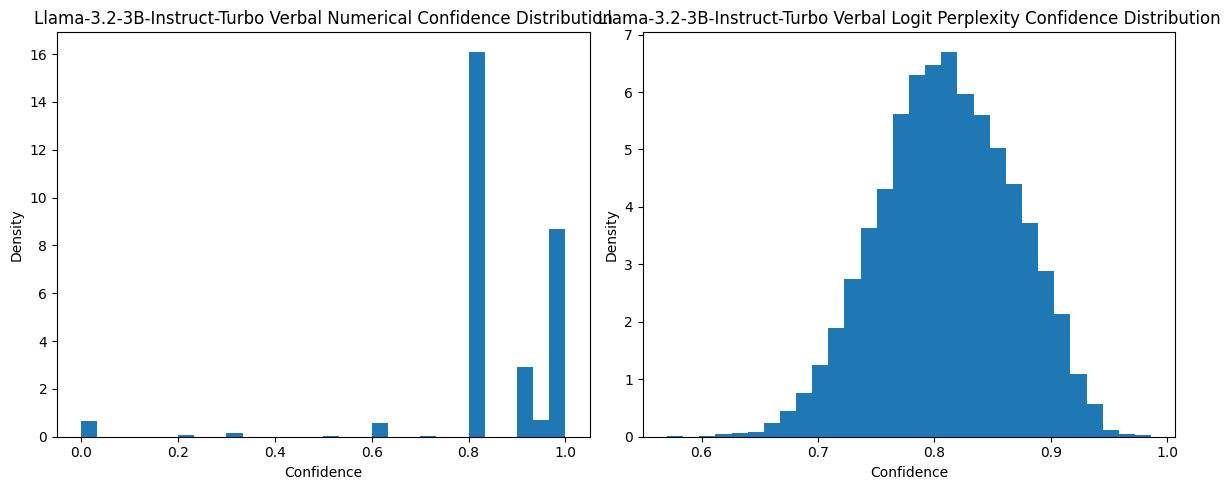

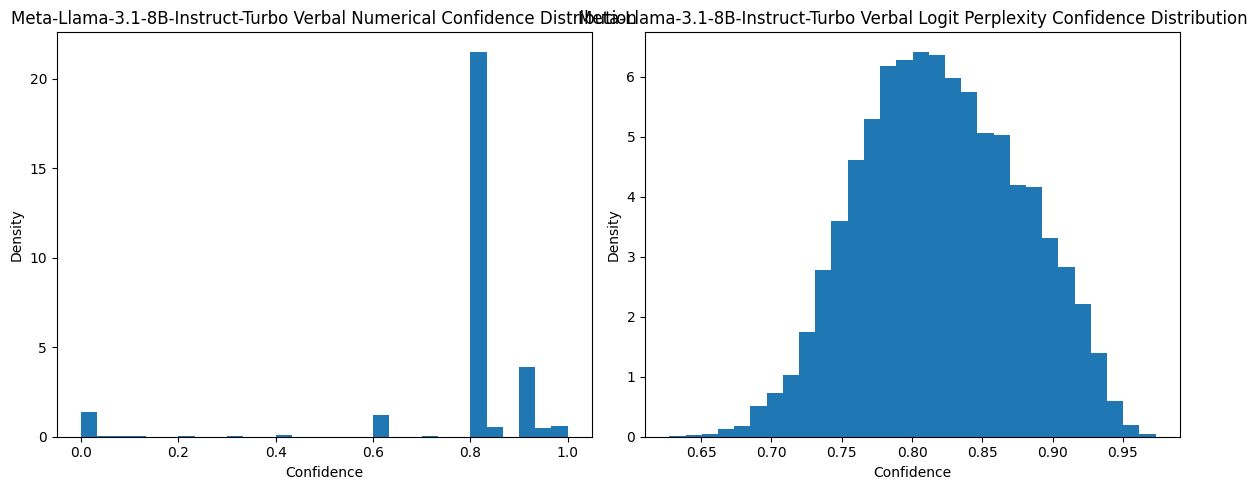

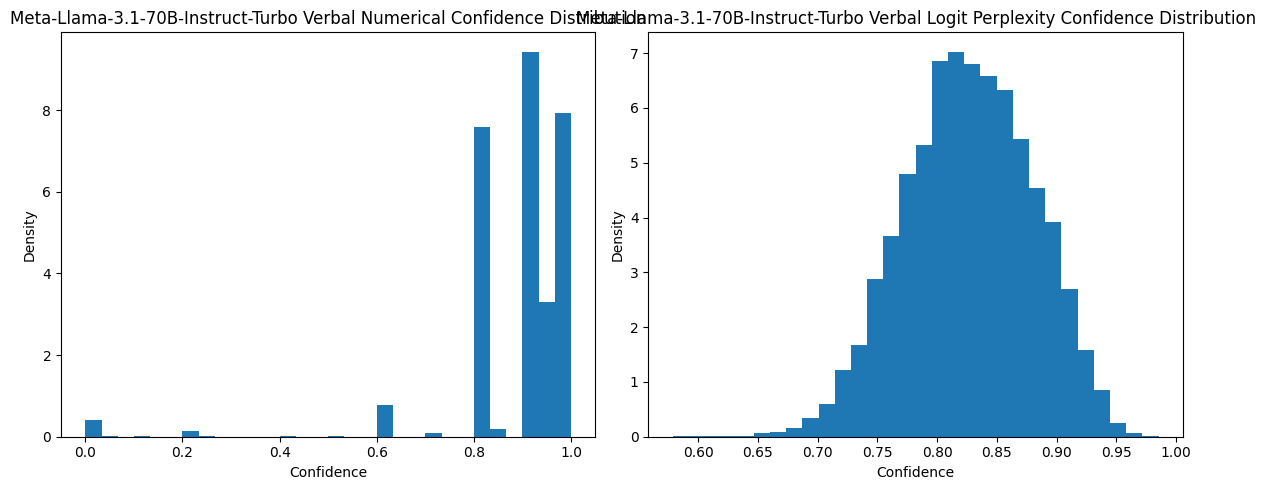

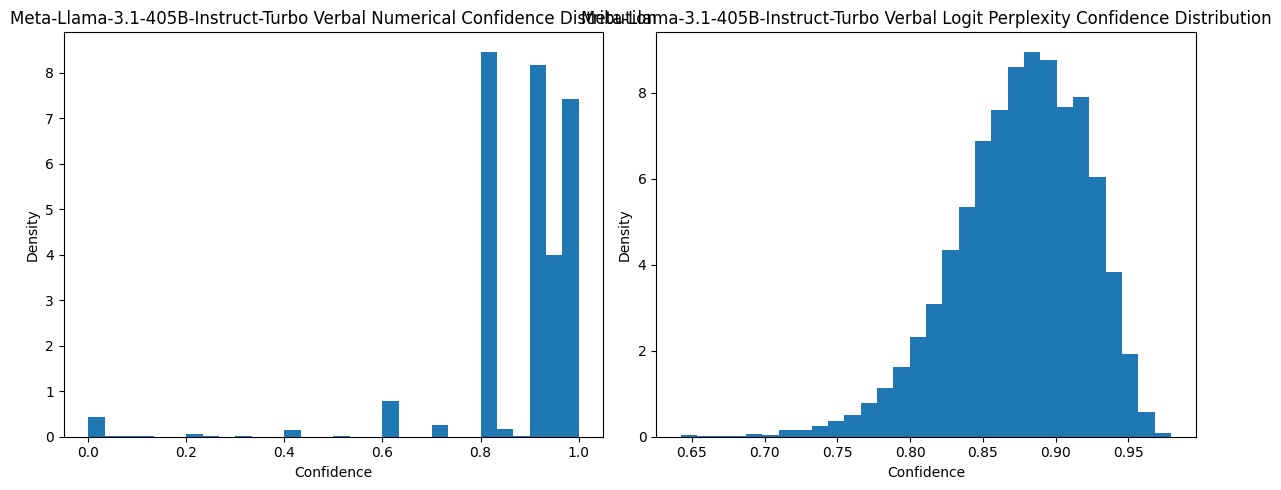

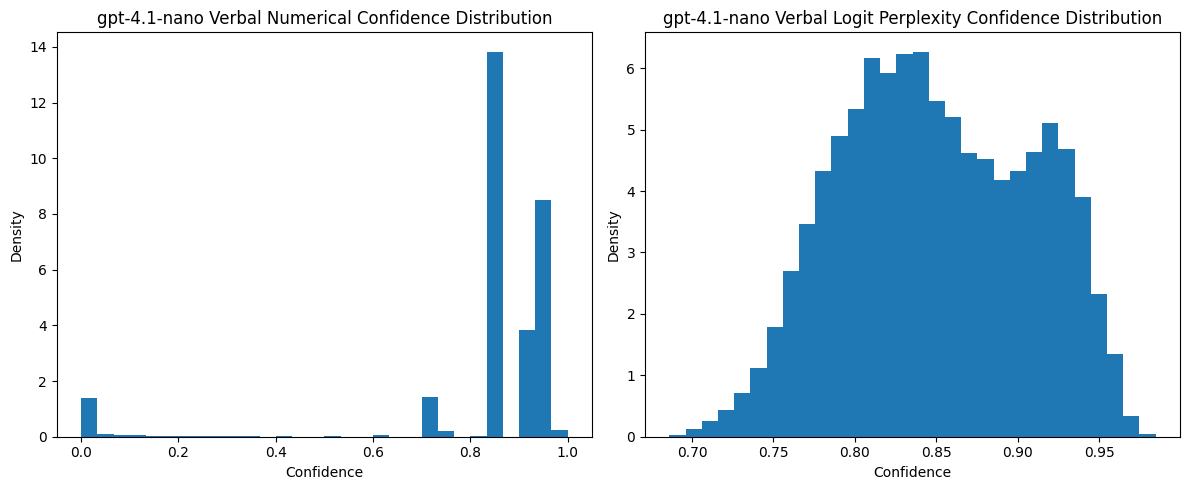

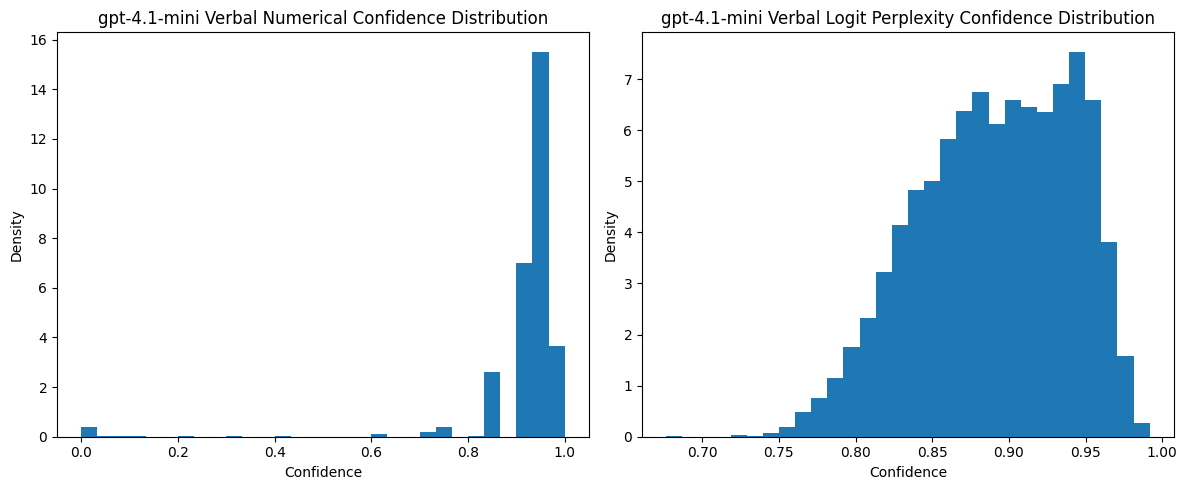

In [4]:
for model in all_models:
    verbal_num = get_confidence(html_filename.format(model=model, confidence="verbal_numerical"))
    logits_perp = get_confidence(html_filename.format(model=model, confidence="logit_perplexity"))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # First histogram
    axes[0].hist(verbal_num, density=True, bins=30)
    axes[0].set_title(f'{model} Verbal Numerical Confidence Distribution')
    axes[0].set_xlabel('Confidence')
    axes[0].set_ylabel('Density')

    # Second histogram
    axes[1].hist(logits_perp, density=True, bins=30)
    axes[1].set_title(f'{model} Verbal Logit Perplexity Confidence Distribution')
    axes[1].set_xlabel('Confidence')
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

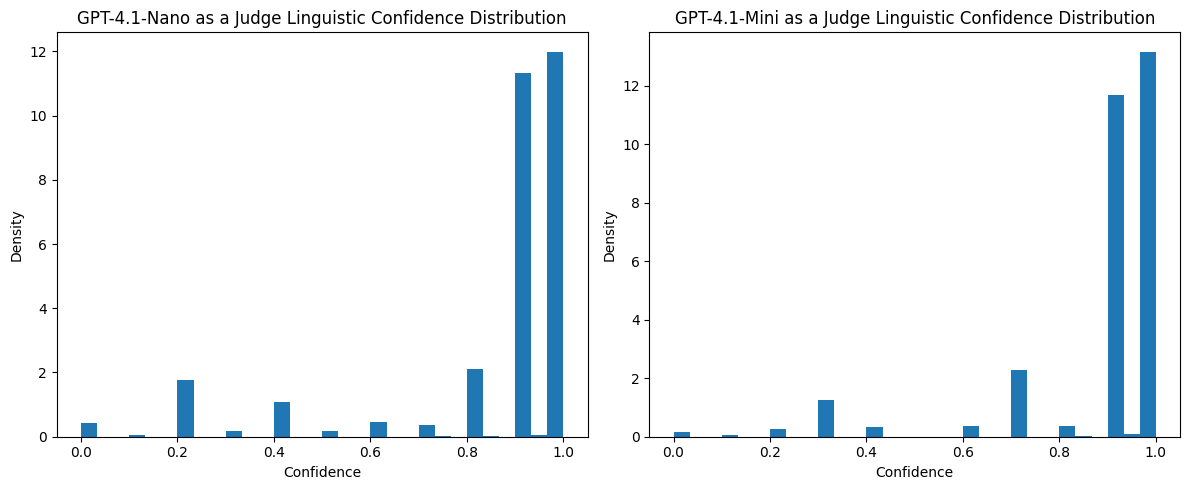

In [4]:
nano = get_confidence("../results/linguistic-judges/mmlu_pro_Meta-Llama-3.1-405B-Instruct-Turbo_verbal_linguistic_shared_sampling_None_gpt-4.1-nano_dec_judge.html")
mini = get_confidence("../results/linguistic-judges/mmlu_pro_Meta-Llama-3.1-405B-Instruct-Turbo_verbal_linguistic_shared_sampling_None_gpt-4.1-mini_dec_judge.html")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First histogram
axes[0].hist(nano, density=True, bins=30)
axes[0].set_title(f'GPT-4.1-Nano as a Judge Linguistic Confidence Distribution')
axes[0].set_xlabel('Confidence')
axes[0].set_ylabel('Density')

# Second histogram
axes[1].hist(mini, density=True, bins=30)
axes[1].set_title(f'GPT-4.1-Mini as a Judge Linguistic Confidence Distribution')
axes[1].set_xlabel('Confidence')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

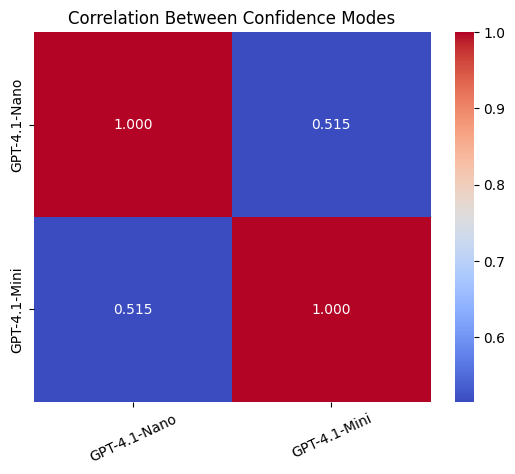

In [ ]:
corr = pd.DataFrame({"GPT-4.1-Nano": nano, "GPT-4.1-Mini": mini}).corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Between Confidence Judges")
plt.xticks(rotation=25)
plt.show()

## ECE vs. Accuracy Scatter Plots

In [9]:
json_filesname = """../results/mmlu_pro_{model}_{confidence}_shared_sampling_None.json"""

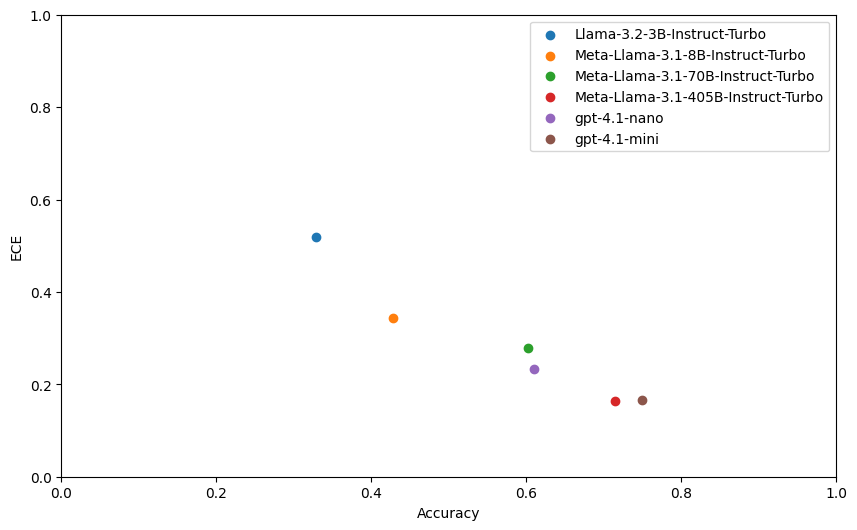

In [10]:
plt.figure(figsize=(10, 6))
for model in all_models:
    with open(json_filesname.format(model=model, confidence="verbal_numerical"), 'r') as f:
        verb_num = json.load(f)
    plt.xlim(left=0, right=1)
    plt.ylim(bottom=0, top=1)
    plt.scatter(verb_num["score"], verb_num["ECE"], label=model)
plt.xlabel("Accuracy")
plt.ylabel("ECE")
plt.legend()
plt.show()

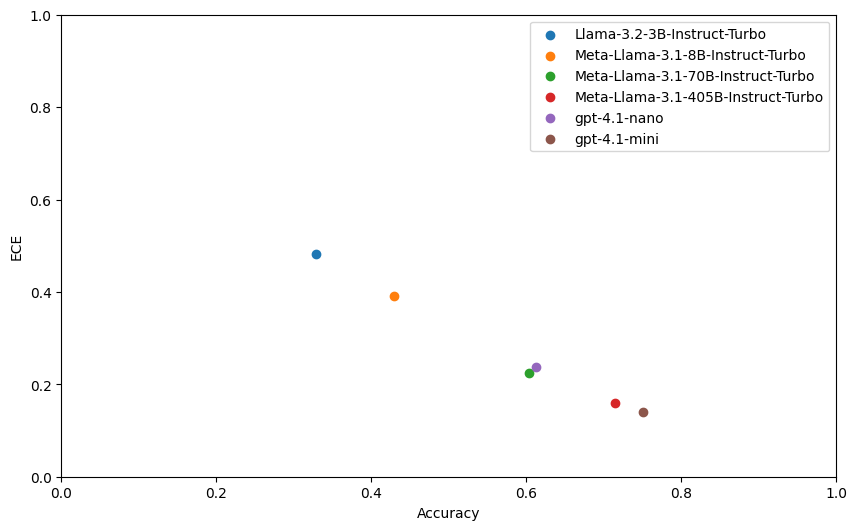

In [11]:
plt.figure(figsize=(10, 6))
for model in all_models:
    with open(json_filesname.format(model=model, confidence="logit_perplexity"), 'r') as f:
        logits_perp = json.load(f)
    plt.xlim(left=0, right=1)
    plt.ylim(bottom=0, top=1)
    plt.scatter(logits_perp["score"], logits_perp["ECE"], label=model)
plt.xlabel("Accuracy")
plt.ylabel("ECE")
plt.legend()
plt.show()    

# Confidence Corrolation

In [12]:
filenames = [os.path.join("../results", f) for f in os.listdir('../results/')  if not f.startswith('.') and not f.startswith('linguistic') and not f.endswith(".json")] + [os.path.join("../results/linguistic-judges", f) for f in os.listdir('../results/linguistic-judges') if not f.startswith('.') and not f.startswith('linguistic') and not f.endswith(".json")] 
filenames = sorted(filenames)

In [13]:
# names = {
# '../results/mmlu_pro_Llama-3.2-3B-Instruct-Turbo_logit_perplexity_shared_sampling_None.html': "Llama-3.2-3B-Instruct-Turbo Logit Perplexity",
#  '../results/mmlu_pro_gpt-4.1-mini_verbal_numerical_shared_sampling_None.html': "GPT-4.1-Mini Verbal Numerical",
#  '../results/mmlu_pro_gpt-4.1-mini_logit_perplexity_shared_sampling_None.html' : "GPT-4.1-Mini Logit Perplexity",
#  '../results/mmlu_pro_Meta-Llama-3.1-8B-Instruct-Turbo_logit_perplexity_shared_sampling_None.html' : "Meta-Llama-3.1-8B-Instruct-Turbo Logit Perplexity",
#  '../results/mmlu_pro_Meta-Llama-3.1-8B-Instruct-Turbo_verbal_numerical_shared_sampling_None.html',
#  '../results/mmlu_pro_gpt-4.1-nano_logit_perplexity_shared_sampling_None.html',
#  '../results/mmlu_pro_Meta-Llama-3.1-405B-Instruct-Turbo_verbal_numerical_shared_sampling_None.html',
#  '../results/mmlu_pro_Meta-Llama-3.1-70B-Instruct-Turbo_verbal_numerical_shared_sampling_None.html',
#  '../results/mmlu_pro_gpt-4.1-nano_verbal_numerical_shared_sampling_None.html',
#  '../results/mmlu_pro_Meta-Llama-3.1-405B-Instruct-Turbo_logit_perplexity_shared_sampling_None.html',
#  '../results/mmlu_pro_Meta-Llama-3.1-70B-Instruct-Turbo_logit_perplexity_shared_sampling_None.html',
#  '../results/mmlu_pro_Llama-3.2-3B-Instruct-Turbo_verbal_numerical_shared_sampling_None.html',
#  '../results/linguistic-judges/mmlu_pro_Meta-Llama-3.1-405B-Instruct-Turbo_verbal_linguistic_shared_sampling_None_gpt-4.1-mini_dec_judge.html',
#  '../results/linguistic-judges/mmlu_pro_Meta-Llama-3.1-405B-Instruct-Turbo_verbal_linguistic_shared_sampling_None_gpt-4.1-nano_dec_judge.html
# }

In [14]:
conf_dict = dict()
for file in filenames:
    conf_dict[file] = get_confidence(file)
    print(len(conf_dict[file]))

12032
12032
12032
12032
12032
12032
12032
12032
12032
12032
12032
12032
12032
12032


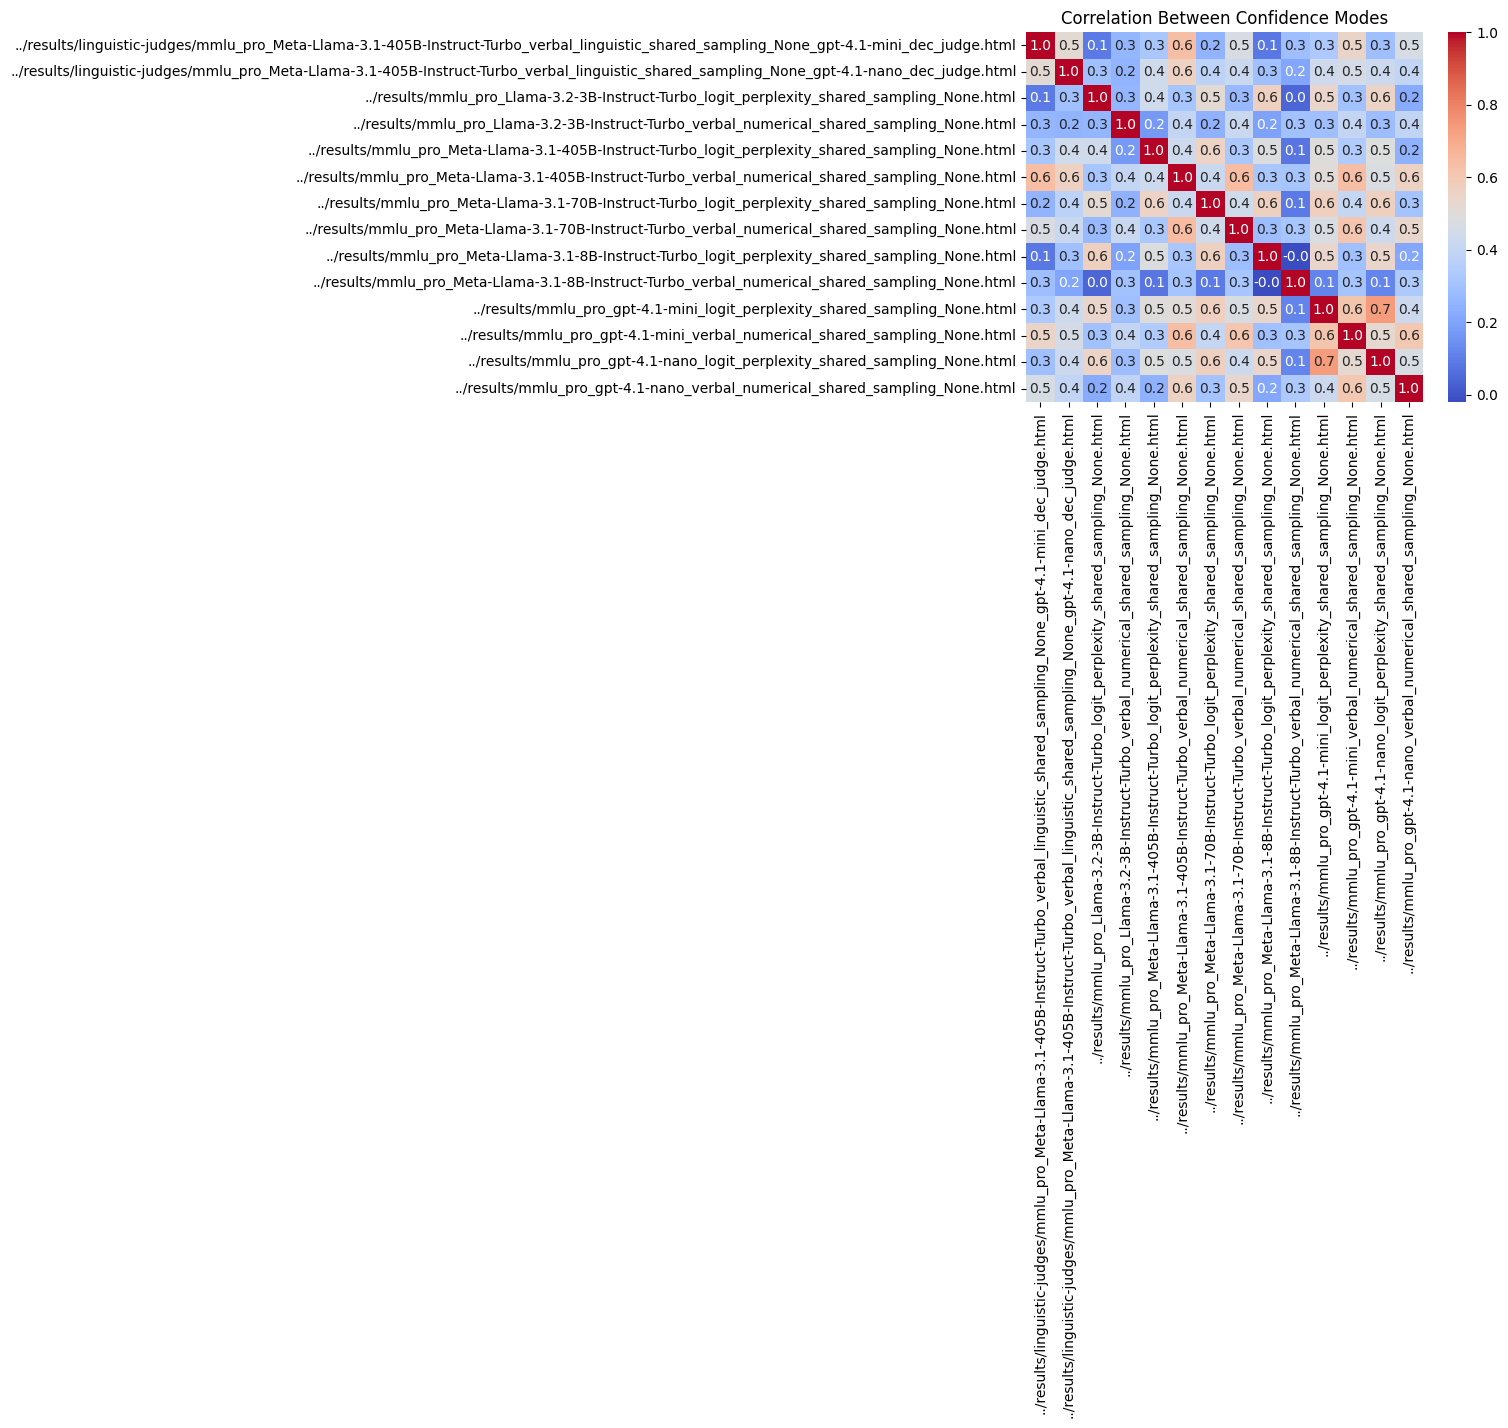

In [ ]:
df = pd.DataFrame(conf_dict)
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Between Confidence Modes")
plt.xticks(rotation=90)
plt.show()